# EDA on Bank Marketing Dataset

The data is collected from a marketing campaign of a banking institution. The marketing campaigns were done on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Input variables:
<br>
**bank client data:**
<br>
1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')  
<br>

**related with the last contact of the current campaign:**
<br>
8.  contact: contact communication type (categorical: 'cellular','telephone') 
9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>

**other attributes:**
<br>
12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>

**social and economic context attributes:**
<br>
16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.  cons.price.idx: consumer price index - monthly indicator (numeric) 
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19.  euribor3m: euribor 3 month rate - daily indicator (numeric)
20.  nr.employed: number of employees - quarterly indicator (numeric)
<br>

**Output variable (desired target):**
<br>
21.  y - has the client subscribed a term deposit? (binary: 'yes','no')

**Source:**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

The dataset can be found [here at UCI website](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [58]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
pd.options.display.max_columns = None
pd.options.display.max_rows = 15
%matplotlib inline


In [155]:
# Load the dataset

data = pd.read_csv(r'./dataset/bank-marketing-full.csv', sep=';')

display(data.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**1. Describe each columns (data types, unique values/range of values, missing values, etc.)**

In [6]:
# data shape
print(f'The data have {data.shape[0]} rows, and {data.shape[1]} columns')

The data have 41188 rows, and 21 columns


In [8]:
# data info, any missing values, dtypes
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

None

In [55]:
print(f"Number of categorical columns is {len(data.select_dtypes(include=['object']).columns)}")
print(f"Number of numerical columns is {len(data.select_dtypes(exclude=['object']).columns)}")

Number of categorical columns is 11
Number of numerical columns is 10


There is no missing values on the dataset, it is a good sign

In [35]:
# columns describe
display(data.describe())
print(f"Number of age unique values is {len(data['age'].unique())}")
print(f"Range of age values in is {data['age'].describe()['max'] - data['age'].describe()['min']}")
print(f"Median of pdays is {data['pdays'].median()}")
print(f"Mean of pdays is (if we exclude customer that not contacted) {data[data['pdays'] != 999]['pdays'].median()}")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Number of age unique values is 78
Range of age values in is 81.0
Median of pdays is 999.0
Mean of pdays is (if we exclude customer that not contacted) 6.0


The range of customers age is a high number, that mean the customer vary from a youngster to an old school

Most of the customer didn't contacted, but for those who contacted they have an average of being contacted for about six times

In [57]:
display(data['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64

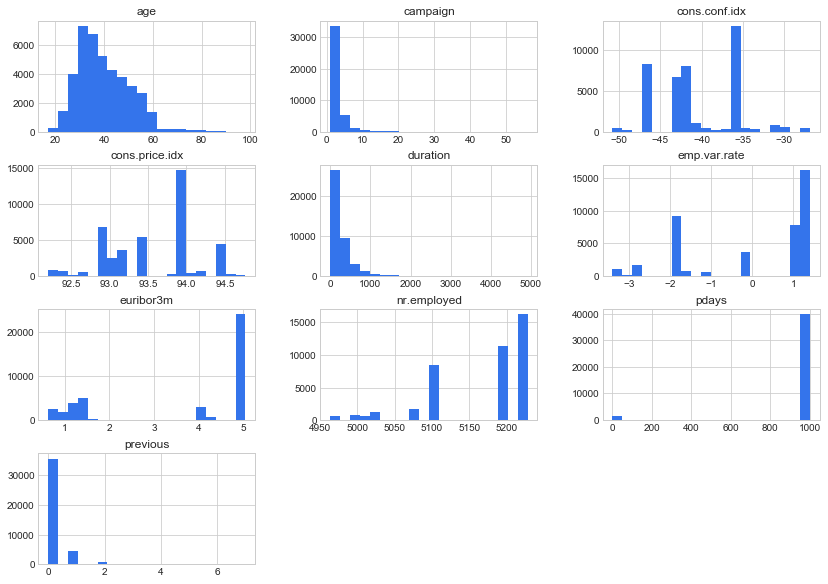

In [60]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#3474eb')
plt.show()

It looks like all the data is very skewed to a certain values

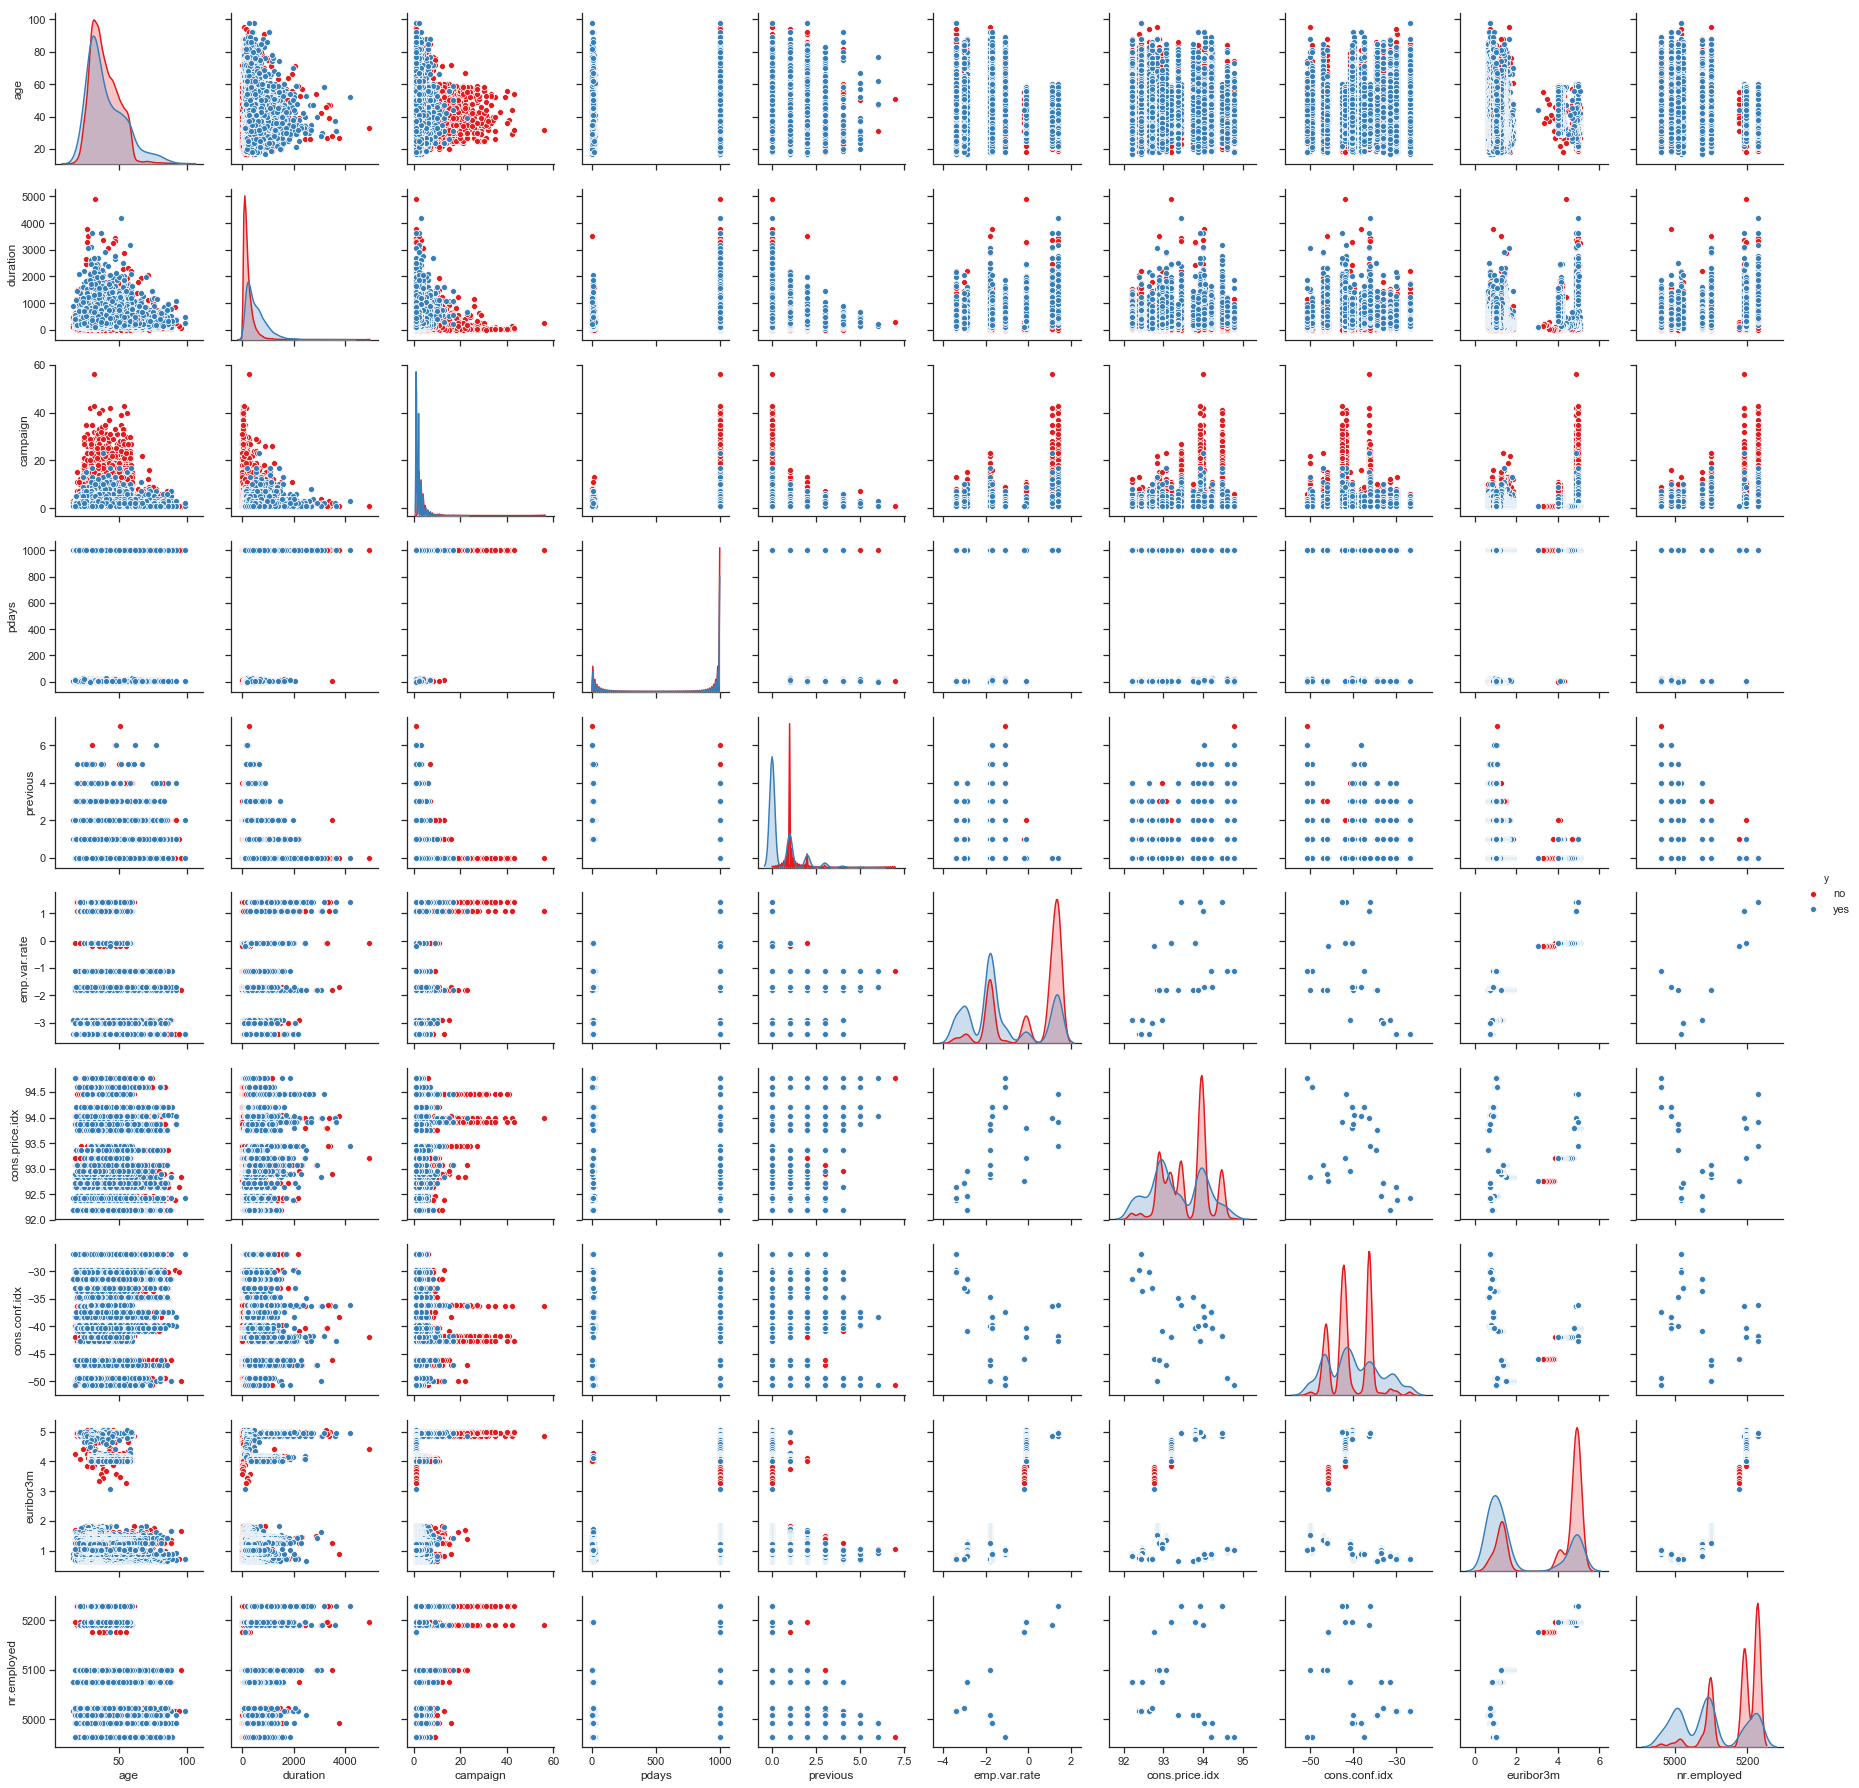

In [69]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data, hue="y", palette="Set1")
plt.show()

From plot above there are some features that looks promising to predict target variable, because those features can distinguish the target

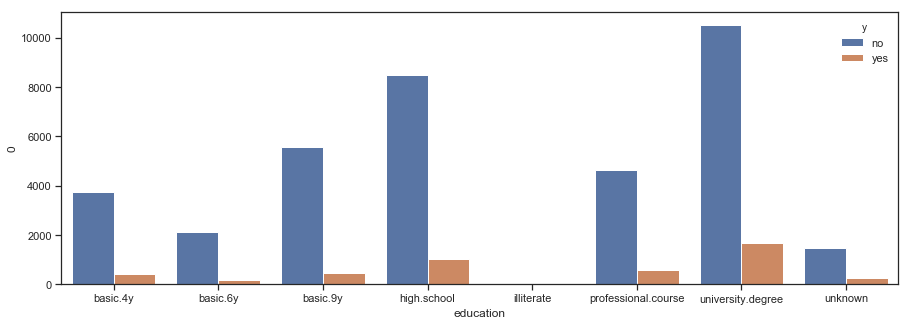

In [105]:
tmp = data.groupby(by=['education', 'y']).size().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=tmp['education'], y=tmp[0], hue=tmp['y'], data=tmp)
plt.show()

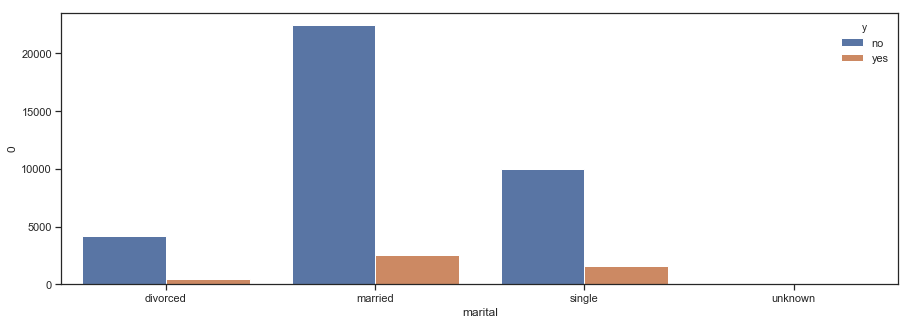

In [106]:
tmp = data.groupby(by=['marital', 'y']).size().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=tmp['marital'], y=tmp[0], hue=tmp['y'], data=tmp)
plt.show()

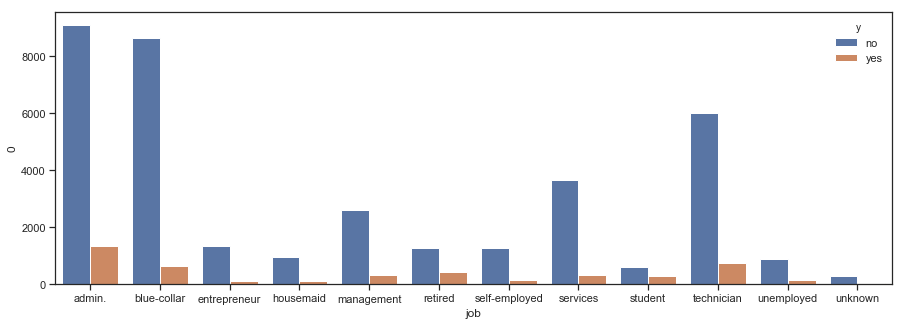

In [104]:
tmp = data.groupby(by=['job', 'y']).size().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=tmp['job'], y=tmp[0], hue=tmp['y'], data=tmp)
plt.show()

Above plots is to see the distribution of the target based on the customer education, marital status, and job

In [126]:
display(data.groupby(by=['job'])['age'].median().reset_index().sort_values('age'))

,job,age
8,student,25
0,admin.,36
7,services,36
9,technician,37
1,blue-collar,39
6,self-employed,39
10,unemployed,39
2,entrepreneur,41
4,management,42
3,housemaid,45


Above results shows us what to be expected, which is older customer are the one that already retired and the younger one are still student

**2. Is the data fit for analysis? If not, what wrangling steps should be done?**

Not quite, we still need to do some steps like encoding the target variable, one hot encode the categorical variable, and do binning for the numerical values.

**3. From the data, what can you describe about their sample of customers?**

In [128]:
# display sample customer that subscribe
subs_mask = data['y']=='yes'
nosubs_mask = data['y']=='no'
display(data[subs_mask].head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [130]:
display(data[subs_mask].describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


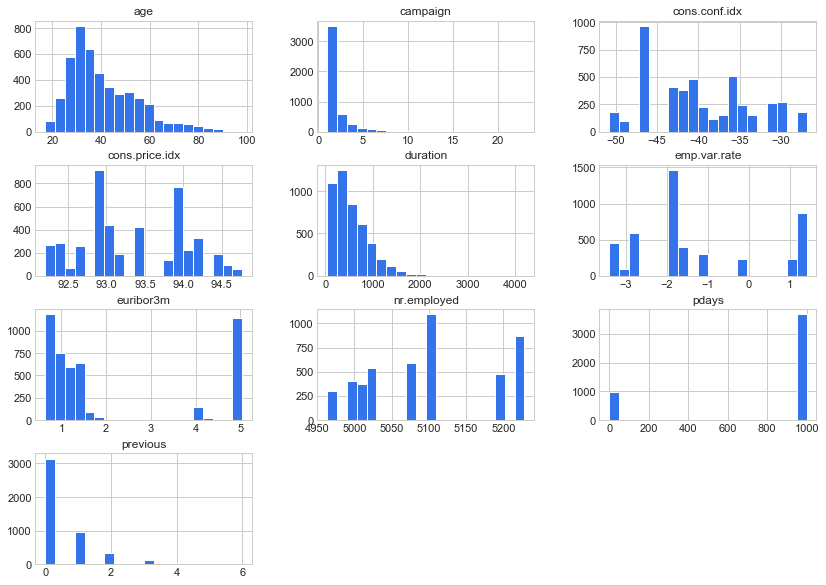

In [131]:
plt.style.use('seaborn-whitegrid')

data[subs_mask].hist(bins=20, figsize=(14,10), color='#3474eb')
plt.show()

In [149]:
# Bin the ages to four categories
age_cats = ['Student', 'Young', 'Adult', 'Senior']
interval = (15, 25, 35, 60, 120)
data["age_cat"] = pd.cut(data['age'], interval, labels=age_cats)

In [156]:
# Show how many categories for each object columns
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

For two or fewer unique categories we will use label encoding, for others we will use one hot encoding

In [157]:
# Encoding categorical variables
# Create a label encoder object
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
            
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [158]:
# one-hot encoding of categorical variables
data = pd.get_dummies(data)

print(f'New data shape: {data.shape}')

New data shape: (41188, 63)


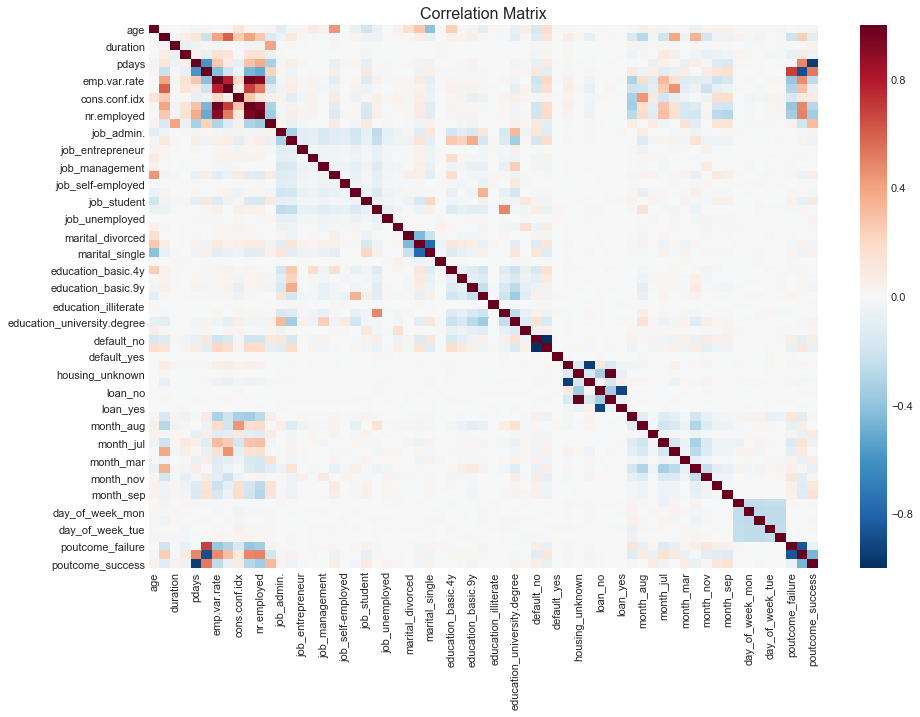

In [166]:
fig = plt.figure(figsize=(15,10))
# data['y'] = LabelEncoder().fit_transform(data['y'])

# Separate both dataframes into 
num_data = data.select_dtypes(exclude="object")
cat_data = data.select_dtypes(include="object")

corr_numeric = num_data.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

From above result we can see that some variables are correlated with some others

In [174]:
feat_corr = data.corr()['y'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', feat_corr.tail(10))
print('\nMost Negative Correlations:\n', feat_corr.head(10))

Most Positive Correlations:
 job_retired         0.092221
job_student         0.093955
default_no          0.099344
month_sep           0.126067
month_oct           0.137366
month_mar           0.144014
previous            0.230181
poutcome_success    0.316269
duration            0.405274
y                   1.000000
Name: y, dtype: float64

Most Negative Correlations:
 nr.employed            -0.354678
pdays                  -0.324914
euribor3m              -0.307771
emp.var.rate           -0.298334
poutcome_nonexistent   -0.193507
contact                -0.144773
cons.price.idx         -0.136211
month_may              -0.108271
default_unknown        -0.099293
job_blue-collar        -0.074423
Name: y, dtype: float64


From above results we can see some variables that gives high correlations, and some others that gives negative correlations.


<div class="alert alert-block alert-info">
As noted above that duration should not be the variables to predict the target, and thus we just can ignore it.</div>

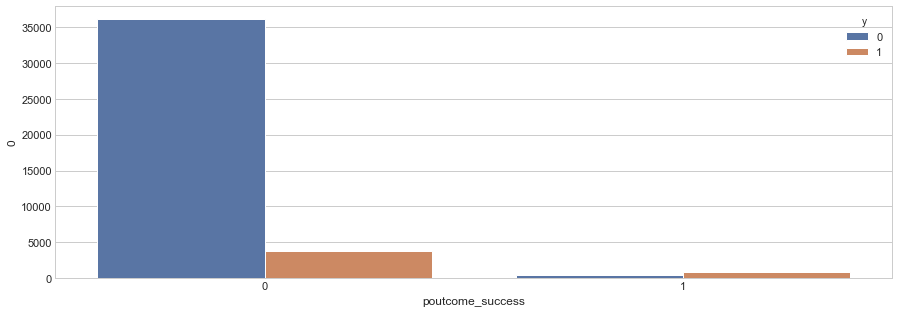

In [180]:
tmp = data.groupby(by=['poutcome_success', 'y']).size().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=tmp['poutcome_success'], y=tmp[0], hue=tmp['y'], data=tmp)
plt.show()

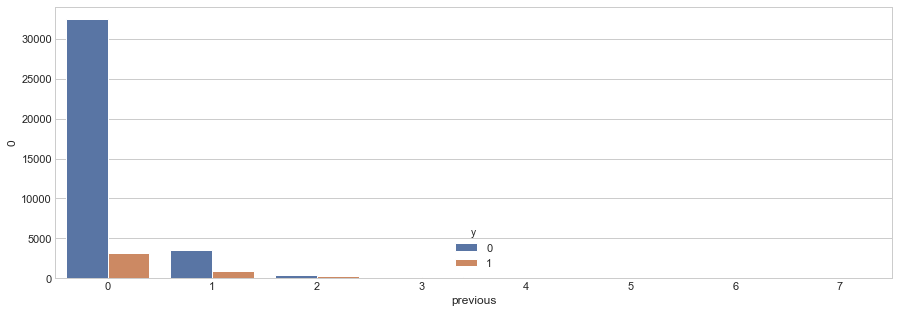

In [198]:
tmp = data.groupby(by=['previous', 'y']).size().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=tmp['previous'], y=tmp[0], hue=tmp['y'], data=tmp)
plt.show()

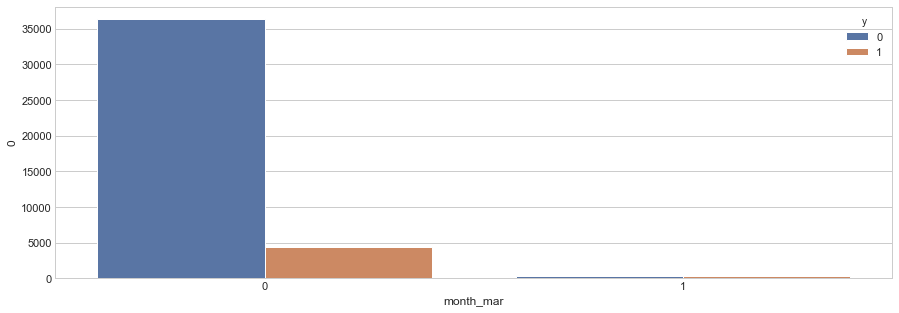

In [185]:
tmp = data.groupby(by=['month_mar', 'y']).size().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=tmp['month_mar'], y=tmp[0], hue=tmp['y'], data=tmp)
plt.show()

From above results we can see the distribution for the most promising variables

In [213]:
display(data[subs_mask][feat_corr.tail(10).index.tolist()[:-2]].describe())
display(data[nosubs_mask][feat_corr.tail(10).index.tolist()[:-2]].describe())

,job_retired,job_student,default_no,month_sep,month_oct,month_mar,previous,poutcome_success
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,0.093534,0.059267,0.904526,0.055172,0.067888,0.059483,0.492672,0.192672
std,0.291211,0.236150,0.293900,0.228341,0.251581,0.236552,0.860344,0.394440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000


,job_retired,job_student,default_no,month_sep,month_oct,month_mar,previous,poutcome_success
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,0.035187,0.016417,0.776814,0.008591,0.011027,0.007388,0.132374,0.013106
std,0.184254,0.127074,0.416388,0.092292,0.104428,0.085634,0.409199,0.113731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


From above results we can see that the average of the customer have flag 1 on poutcome_success, previous, month_mar

In [214]:
display(data[subs_mask][feat_corr.head(10).index.tolist()].describe())
display(data[nosubs_mask][feat_corr.head(10).index.tolist()].describe())

,nr.employed,pdays,euribor3m,emp.var.rate,poutcome_nonexistent,contact,cons.price.idx,month_may,default_unknown,job_blue-collar
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,5095.115991,792.035560,2.123135,-1.233448,0.676940,0.169612,93.354386,0.190948,0.095474,0.137500
std,87.572641,403.407181,1.742598,1.623626,0.467696,0.375332,0.676644,0.393091,0.293900,0.344412
min,4963.600000,0.000000,0.634000,-3.400000,0.000000,0.000000,92.201000,0.000000,0.000000,0.000000
25%,5017.500000,999.000000,0.849000,-1.800000,0.000000,0.000000,92.893000,0.000000,0.000000,0.000000
50%,5099.100000,999.000000,1.266000,-1.800000,1.000000,0.000000,93.200000,0.000000,0.000000,0.000000
75%,5191.000000,999.000000,4.406000,-0.100000,1.000000,0.000000,93.918000,0.000000,0.000000,0.000000
max,5228.100000,999.000000,5.045000,1.400000,1.000000,1.000000,94.767000,1.000000,1.000000,1.000000


,nr.employed,pdays,euribor3m,emp.var.rate,poutcome_nonexistent,contact,cons.price.idx,month_may,default_unknown,job_blue-collar
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,5176.166600,984.113878,3.811491,0.248875,0.887107,0.390090,93.603757,0.352495,0.223104,0.235745
std,64.571979,120.656868,1.638187,1.482932,0.316466,0.487777,0.558993,0.477754,0.416333,0.424469
min,4963.600000,0.000000,0.634000,-3.400000,0.000000,0.000000,92.201000,0.000000,0.000000,0.000000
25%,5099.100000,999.000000,1.405000,-1.800000,1.000000,0.000000,93.075000,0.000000,0.000000,0.000000
50%,5195.800000,999.000000,4.857000,1.100000,1.000000,0.000000,93.918000,0.000000,0.000000,0.000000
75%,5228.100000,999.000000,4.962000,1.400000,1.000000,1.000000,93.994000,1.000000,0.000000,0.000000
max,5228.100000,999.000000,5.045000,1.400000,1.000000,1.000000,94.767000,1.000000,1.000000,1.000000


From above results we can see that the average of the customer have flag 0 on job_blue-collar, default_unknown, month_may

**4. Are they potentially “lucrative” customers? If so, how many of them are and why?**

In [235]:
display(data.loc[(data['poutcome_success']==1) & (data['previous']==1) & (data['month_mar']==1) & (data['default_yes']==0)]['y'].value_counts())

1    33
0    12
Name: y, dtype: int64

From above result we can see that most the customers with flag 1 in those variables are not default, so indeed they are the most potentially lucrative customers

**5. What are the difference between customers who are interested in the product and those who don’t?**

First we need to define what criteria that determine whether or not a customer interested

It looks like that the criteria of a customer that are **not interested** are: *even when they have already contacted they still have no as the target*

It's a vice versa for the criteria of a customer that **interested**: *they have yes as the target when already contacted*

In [238]:
noint_mask = (data['y']==0) & (data['pdays']!=999)
int_mask = (data['y']==1) & (data['pdays']!=999)

In [242]:
display(data[int_mask].describe())
display(data[noint_mask].describe())

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.0,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.0,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.0,967.000000
mean,42.661841,0.073423,367.361944,1.705274,5.913133,1.714581,-2.120993,93.427457,-37.758428,0.885161,5017.732265,1.0,0.317477,0.066184,0.011375,0.029990,0.072389,0.129266,0.018614,0.048604,0.098242,0.156153,0.044467,0.007239,0.102378,0.527404,0.367115,0.003102,0.098242,0.024819,0.059979,0.211996,0.001034,0.141675,0.387797,0.074457,0.968976,0.031024,0.0,0.423992,0.025853,0.550155,0.815926,0.025853,0.158221,0.072389,0.158221,0.032058,0.092037,0.105481,0.071355,0.124095,0.112720,0.106515,0.125129,0.163392,0.164426,0.245088,0.220269,0.206825,0.075491,0.0,0.924509
std,15.957060,0.260964,244.931877,1.007736,3.727896,0.944212,0.803785,0.790848,6.354300,0.277479,43.031385,0.0,0.465736,0.248732,0.106102,0.170647,0.259265,0.335667,0.135228,0.215150,0.297796,0.363188,0.206238,0.084817,0.303302,0.499507,0.482268,0.055641,0.297796,0.155654,0.237571,0.408933,0.032158,0.348897,0.487500,0.262649,0.173472,0.173472,0.0,0.494445,0.158779,0.497736,0.387745,0.158779,0.365137,0.259265,0.365137,0.176245,0.289228,0.307331,0.257550,0.329861,0.316414,0.308655,0.331037,0.369914,0.370854,0.430362,0.414642,0.405239,0.264319,0.0,0.264319
min,17.000000,0.000000,63.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,30.000000,0.000000,208.000000,1.000000,3.000000,1.000000,-2.900000,92.649000,-40.300000,0.715000,4991.600000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,38.000000,0.000000,293.000000,1.000000,6.000000,1.000000,-1.800000,93.369000,-38.300000,0.849000,5008.700000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.0,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.0,548.000000,548.000000,548.000000,548.000000,548.000000,548.0,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.0,548.000000
mean,40.425182,0.076642,240.532847,2.029197,6.193431,1.565693,-2.052555,93.192604,-39.370073,1.163799,5049.559489,0.0,0.295620,0.118613,0.027372,0.021898,0.067518,0.091241,0.025547,0.052920,0.082117,0.153285,0.040146,0.023723,0.076642,0.523723,0.395985,0.003650,0.082117,0.034672,0.114964,0.231752,0.0,0.118613,0.370438,0.047445,0.937956,0.062044,0.0,0.430657,0.016423,0.552920,0.843066,0.016423,0.140511,0.082117,0.151460,0.027372,0.052920,0.094891,0.038321,0.233577,0.147810,0.098540,0.072993,0.160584,0.275547,0.193431,0.195255,0.175182,0.125912,0.0,0.874088
std,13.954217,0.266266,251.574946,1.550805,3.987525,0.909663,0.881339,0.747037,6.974200,0.776226,60.461253,0.0,0.456738,0.323628,0.163315,0.146484,0.251147,0.288214,0.157925,0.224078,0.274793,0.360591,0.196481,0.152323,0.266266,0.499893,0.489508,0.060357,0.274793,0.183114,0.319269,0.422337,0.0,0.323628,0.483363,0.212784,0.241455,0.241455,0.0,0.495621,0.127213,0.497646,0.364071,0.127213,0.347834,0.274793,0.358824,0.163315,0.224078,0.293331,0.192146,0.423492,0.355236,0.298316,0.260362,0.367482,0.447198,0.395349,0.396759,0.380470,0.332054,0.0,0.332054
min,17.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,30.000000,0.000000,110.000000,1.000000,3.000000,1.000000,-2.900000,92.649000,-46.200000,0.742000,5008.700000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,36.000000,0.000000,167.000000,2.000000,6.000000,1.000000,-1.800000,92.963000,-40.000000,0.891500,5076.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Differences by columns (only the columns that shown some differences):
- age: not applicable
- contact: not applicable
- duration: not applicable
- previous: not applicable
- emp.var.rate: not applicable
- cons.price.idx: not applicable
- cons.conf.idx: not applicable
- campaign: looks like the interested customer tend to have less campaign (it means that more campaign is not making the customer more interested)
- euribor3m: looks like customer are more interested on a lower interest rate (make sense)
- job : not applicable
- marital: not applicable
- education: not applicable
- default: not applicable
- housing: not applicable
- loan: not applicable
- month: not applicable
- day: not applicable
- poutcome: not applicable